# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
display(data.head())
pd.set_option('display.max_columns', None)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В столбце is_apartment тип данных 'object', что не соответствует 'bool', указанному в документации.
Количество значений в столбцах рзличается. Значит, в данных есть пропущенные значения.
В одном из названий столбцов использованы строчные и прописные буквы, а так же нет разделения с помощью символа '_'.

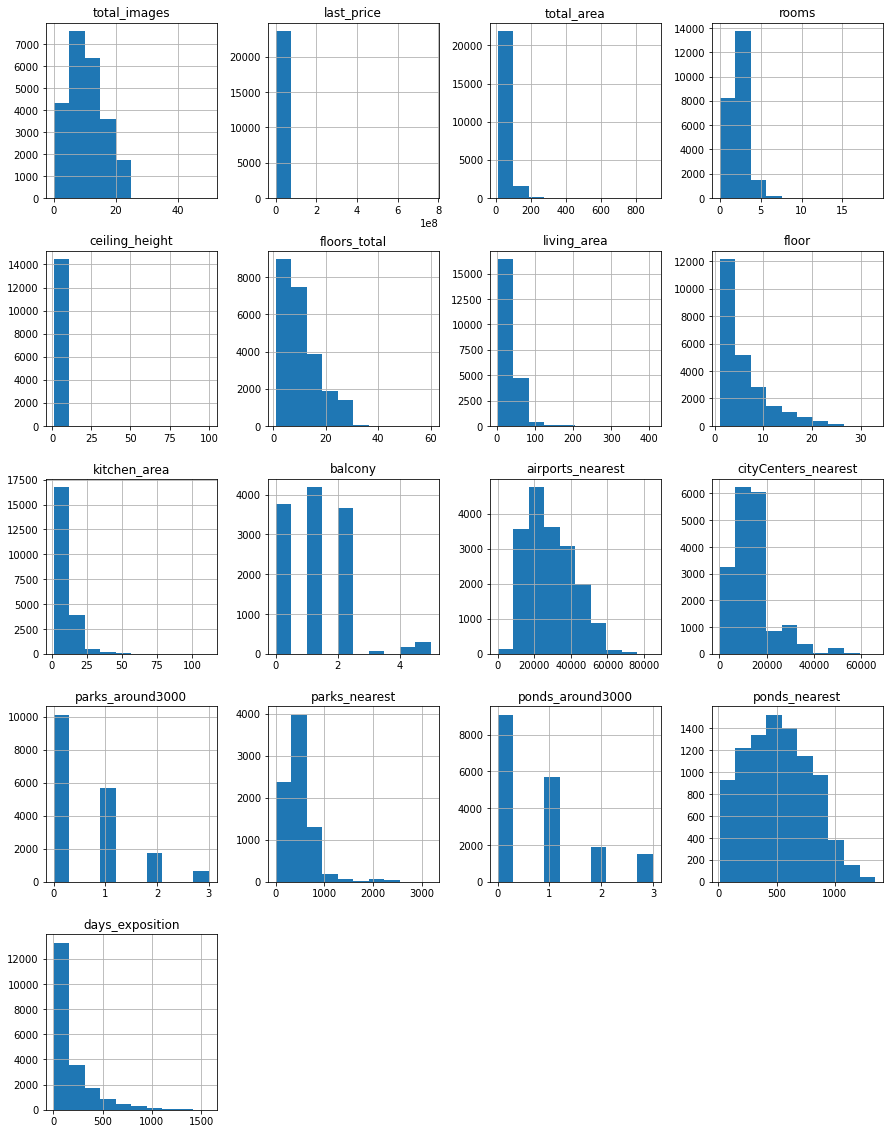

In [5]:
data.hist(figsize=(15, 20))
plt.show()

**Вывод**

На гистограмме с высотой потоловков видно, что значения от 1 метра до 10 метров. Значения ниже роста человека, выглядят неправдаподобными, как и очень большие.
Есть минимальное количество объектов с общей площадью более 200 кв. м, с жилой площадью более 125 кв. м и количеством комнат более 6. Можем ли их считать выбросами?
Большая часть объектов были проданы в срок примерно до 160 дней, остальные до 500 дней. Но есть ряд объектов, срок продажи, которых составлял более 500 дней и даже более 1000 дней. Необходимо проверить корректность и реалистично этих данных.

### Предобработка данных

Проверим названия столбцов и исправим, если это необходимо.

In [6]:
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [7]:
data = data.rename(
    columns ={
        'cityCenters_nearest': 'city_centers_nearest'
    }
)

In [8]:
print(data.columns) #выведем исправленные названия столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


Посчитаем пропущенные значения.

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропущенные значения в столбце 'balcony' предполагают отсутствие балкона.
Поэтому можем заменить их на ноль.


In [10]:
data['balcony'] = data['balcony'].fillna(0)

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуск в колонке 'ceiling_height' (высота потолка) может быть связан с тем, что считают, что это стандартный параметр, поэтому не указазывают.
Выведем количество квартир с различной высотой потолка.

In [12]:
print(data['ceiling_height'].value_counts().head(30))

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
2.55     980
2.75     910
2.65     676
3.20     277
3.10     203
2.90     164
3.30     141
2.56     139
3.50     130
2.57     103
2.85     101
3.40      92
2.54      83
2.64      81
2.52      79
2.53      67
2.58      63
2.77      61
2.76      60
3.15      57
2.78      51
2.95      47
3.05      46
4.00      39
3.25      36
Name: ceiling_height, dtype: int64


Заменим высоту потолка на медианное значение, распределив по группам в зависимости от количества этажей

In [13]:
median_ceiling_height = data.groupby('floors_total')['ceiling_height'].median()
for value in median_ceiling_height.index:
    data.loc[(data['floors_total'] == value) & (data['ceiling_height'].isna()), 'ceiling_height'] = median_ceiling_height[value]

Проверим количество нулевых значений

In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height             78
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Удалим строки с оставшимися нулевыми значениями высоты потолка

In [15]:
data = data.dropna(subset=['ceiling_height'])

In [16]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                9
living_area              1873
floor                       0
is_apartment            20847
studio                      0
open_plan                   0
kitchen_area             2235
balcony                     0
locality_name              48
airports_nearest         5533
city_centers_nearest     5510
parks_around3000         5509
parks_nearest           15574
ponds_around3000         5509
ponds_nearest           14555
days_exposition          3175
dtype: int64

Проверим уникальные значения параметра 'is_apartment'

In [17]:
print(data['is_apartment'].unique())

[nan False True]


Данное значение имеет булев тип и может иметь только два значения: True и False.
Соответственно значение True присвоено в случае, если объект является апартаментами.
Если не является, то в ячейках будет значение False.
Можем предположить, что в случае отсутсвия значения объект является обычной квартирой. Отличный от стандартного вида недвижимости в большинстве случаев будет указан при размещения объявления. Соответственно, присвоим пропущенным значениям - False.
На всякий случай, уточнила бы у внутреннего заказчика соотношение апартаментов и квартир в целом по рынку в данном городе.

In [18]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [19]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                9
living_area              1873
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2235
balcony                     0
locality_name              48
airports_nearest         5533
city_centers_nearest     5510
parks_around3000         5509
parks_nearest           15574
ponds_around3000         5509
ponds_nearest           14555
days_exposition          3175
dtype: int64

Заменим пропущенные значения площадь гостиной - 'living_area' и площадь кухни - 'kitchen_area' на медианные значения, полученные при группировке по количеству комнат.

In [20]:
median_living_area = data.groupby('rooms')['living_area'].median()
for value in median_living_area.index:
    data.loc[(data['rooms'] == value) & (data['living_area'].isna()), 'living_area'] = median_living_area[value]

In [21]:
median_kitchen_area = data.groupby('rooms')['kitchen_area'].median()
for value in median_kitchen_area.index:
    data.loc[(data['rooms'] == value) & (data['kitchen_area'].isna()), 'kitchen_area'] = median_kitchen_area[value]

Проверяем, количество пропусков после замены.

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                9
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              194
balcony                     0
locality_name              48
airports_nearest         5533
city_centers_nearest     5510
parks_around3000         5509
parks_nearest           15574
ponds_around3000         5509
ponds_nearest           14555
days_exposition          3175
dtype: int64

Все пропуски в столбце 'living_area' заменены, а в 'kitchen_area' осталось 194 пропущенных значений.
Посмотрим количество значений при группировки по числу комнат.

In [23]:
data.groupby('rooms').count()

,total_images,last_price,total_area,first_day_exposition,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
rooms,,,,,,,,,,,,,,,,,,,,,
0,194,194,194,194,194,194,194,194,194,194,194,0,194,194,117,117,117,28,117,68,180
1,8018,8018,8018,8018,8018,8015,8018,8018,8018,8018,8018,8018,8018,8007,5858,5863,5863,2263,5863,2831,7248
2,7916,7916,7916,7916,7916,7913,7916,7916,7916,7916,7916,7916,7916,7900,5894,5904,5904,2665,5904,2838,6889
3,5796,5796,5796,5796,5796,5794,5796,5796,5796,5796,5796,5796,5796,5780,4677,4681,4682,2202,4682,2386,4803
4,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,1172,1054,1056,1056,563,1056,623,938
5,325,325,325,325,325,325,325,325,325,325,325,325,325,325,299,300,300,194,300,192,251
6,105,105,105,105,105,104,105,105,105,105,105,105,105,105,102,102,102,68,102,73,76
7,59,59,59,59,59,59,59,59,59,59,59,59,59,59,56,57,57,38,57,38,37
8,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,11,12,8,11


Получается, что 194 пропусков в столбце 'kitchen_area' соответствуют количеству квартир для которых указано 0 комнат - это квартиры-студио, в которых нет отдельного помещения для кухни, а только выделена зона кухни в общей комнате.
Соответственно, заменим пропуски на 'not available'

In [24]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

Проверим количество пропусков после замены.

In [25]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                9
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5533
city_centers_nearest     5510
parks_around3000         5509
parks_nearest           15574
ponds_around3000         5509
ponds_nearest           14555
days_exposition          3175
dtype: int64

Есть небольшое количество пропусков в названии населенного пункта ('locality_name'). Это один из основных параметров, который может оказывать существенное влияние на стоимомость недвижимости. Так как количество пропусков минимально, то удалим эти строки.
Но необходимо для будущего сбора данных выяснить причину данных пропусков. Если это поле заполняется пользователем, то сделать его обязательным. Если определяется системой, то выяснить и устранить причину пропусков.

In [26]:
data = data.dropna(subset=['locality_name'])

In [27]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                9
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5525
city_centers_nearest     5502
parks_around3000         5501
parks_nearest           15541
ponds_around3000         5501
ponds_nearest           14532
days_exposition          3174
dtype: int64

Остальные параметры нет возможности заменить, а удаление может оказать существенное влияние на результаты. Поэтому оставляем без изменений.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23573 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23573 non-null  int64  
 1   last_price            23573 non-null  float64
 2   total_area            23573 non-null  float64
 3   first_day_exposition  23573 non-null  object 
 4   rooms                 23573 non-null  int64  
 5   ceiling_height        23573 non-null  float64
 6   floors_total          23564 non-null  float64
 7   living_area           23573 non-null  float64
 8   floor                 23573 non-null  int64  
 9   is_apartment          23573 non-null  bool   
 10  studio                23573 non-null  bool   
 11  open_plan             23573 non-null  bool   
 12  kitchen_area          23573 non-null  float64
 13  balcony               23573 non-null  float64
 14  locality_name         23573 non-null  object 
 15  airports_nearest   

Надо изменить тип данных в столбце 'first_day_exposition' из object в datetime.

In [29]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23573 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23573 non-null  int64         
 1   last_price            23573 non-null  float64       
 2   total_area            23573 non-null  float64       
 3   first_day_exposition  23573 non-null  datetime64[ns]
 4   rooms                 23573 non-null  int64         
 5   ceiling_height        23573 non-null  float64       
 6   floors_total          23564 non-null  float64       
 7   living_area           23573 non-null  float64       
 8   floor                 23573 non-null  int64         
 9   is_apartment          23573 non-null  bool          
 10  studio                23573 non-null  bool          
 11  open_plan             23573 non-null  bool          
 12  kitchen_area          23573 non-null  float64       
 13  balcony         

Изучим уникальные значения в столбце 'locality_name'

In [31]:
print(len(data['locality_name'].unique()))

364


In [32]:
print(data['locality_name'].sort_values().unique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

In [33]:
data['locality_name'] = data['locality_name'].replace(['посёлок Пансионат Зелёный Бор'], 'поселок Пансионат Зелёный Бор')
data['locality_name'] = data['locality_name'].replace(['посёлок Возрождение'], 'поселок Возрождение')
data['locality_name'] = data['locality_name'].replace(['городской посёлок Янино-1'], 'городской поселок Янино-1')
data['locality_name'] = data['locality_name'].replace(['посёлок Аннино'], 'поселок Аннино')
data['locality_name'] = data['locality_name'].replace(['посёлок Бугры'], 'поселок Бугры')
data['locality_name'] = data['locality_name'].replace(['посёлок Гаврилово'], 'поселок Гаврилово')
data['locality_name'] = data['locality_name'].replace(['посёлок городского типа Вырица'], 'поселок городского типа Вырица')
data['locality_name'] = data['locality_name'].replace(['посёлок городского типа имени Свердлова'], 'поселок городского типа имени Свердлова')
data['locality_name'] = data['locality_name'].replace(['посёлок городского типа Красный Бор'], 'поселок городского типа Красный Бор')
data['locality_name'] = data['locality_name'].replace(['посёлок городского типа Кузьмолpовский'], 'поселок городского типа Кузьмоловский')
data['locality_name'] = data['locality_name'].replace(['посёлок городского типа Лебяжье'], 'поселок городского типа Лебяжье')
data['locality_name'] = data['locality_name'].replace(['посёлок городского типа Рощино'], 'поселок городского типа Рощино')
data['locality_name'] = data['locality_name'].replace(['посёлок городского типа Рябово'], 'поселок городского типа Рябово')
data['locality_name'] = data['locality_name'].replace(['посёлок городского типа Токсово'], 'поселок городского типа Токсово')
data['locality_name'] = data['locality_name'].replace(['посёлок городского типа Форносово'], 'поселок городского типа Форносово')
data['locality_name'] = data['locality_name'].replace(['посёлок Жилгородок'], 'поселок Жилгородок')
data['locality_name'] = data['locality_name'].replace(['посёлок Ильичёво'], 'поселок Ильичёво')
data['locality_name'] = data['locality_name'].replace(['посёлок Кобралово'], 'поселок Кобралово')
data['locality_name'] = data['locality_name'].replace(['посёлок Коробицыно'], 'поселок Коробицыно')
data['locality_name'] = data['locality_name'].replace(['посёлок Лисий Нос'], 'поселок Лисий Нос')
data['locality_name'] = data['locality_name'].replace(['посёлок Мельниково'], 'поселок Мельниково')
data['locality_name'] = data['locality_name'].replace(['посёлок Мичуринское'], 'поселок Мичуринское')
data['locality_name'] = data['locality_name'].replace(['посёлок Мурино'], 'поселок Мурино')
data['locality_name'] = data['locality_name'].replace(['посёлок Новый Свет'], 'поселок Новый Свет')
data['locality_name'] = data['locality_name'].replace(['посёлок Перово'], 'поселок Перово')
data['locality_name'] = data['locality_name'].replace(['посёлок Петровское'], 'поселок Петровское')
data['locality_name'] = data['locality_name'].replace(['посёлок Победа'], 'поселок Победа')
data['locality_name'] = data['locality_name'].replace(['посёлок Поляны'], 'поселок Поляны')
data['locality_name'] = data['locality_name'].replace(['посёлок Старая Малукса'], 'поселок Старая Малукса')
data['locality_name'] = data['locality_name'].replace(['посёлок Стеклянный'], 'поселок Стеклянный')
data['locality_name'] = data['locality_name'].replace(['посёлок Сумино'], 'поселок Сумино')
data['locality_name'] = data['locality_name'].replace(['посёлок Тельмана'], 'поселок Тельмана')
data['locality_name'] = data['locality_name'].replace(['посёлок Терволово'], 'поселок Терволово')
data['locality_name'] = data['locality_name'].replace(['посёлок Усть-Луга'], 'поселок Усть-Луга')

In [34]:
print(len(data['locality_name'].unique()))

331


In [35]:
data['locality_name'] = data['locality_name'].replace(['городской поселок Большая Ижора'], 'поселок городского типа Большая Ижора')
data['locality_name'] = data['locality_name'].replace(['городской посёлок Лесогорский'], 'поселок городского типа Лесогорский')
data['locality_name'] = data['locality_name'].replace(['городской посёлок Мга'], 'поселок городского типа Мга')
data['locality_name'] = data['locality_name'].replace(['городской посёлок Назия'], 'поселок городского типа Назия')
data['locality_name'] = data['locality_name'].replace(['городской посёлок Павлово'], 'поселок городского типа Павлово')
data['locality_name'] = data['locality_name'].replace(['городской посёлок Рощино'], 'поселок городского типа Рощино')
data['locality_name'] = data['locality_name'].replace(['городской посёлок Советский'], 'поселок городского типа Советский')
data['locality_name'] = data['locality_name'].replace(['посёлок при железнодорожной станции Вещево'], 'поселок станции Вещево')
data['locality_name'] = data['locality_name'].replace(['посёлок при железнодорожной станции Приветнинское'], 'поселок станции Приветнинское')
data['locality_name'] = data['locality_name'].replace(['посёлок Рябово'], ['посёлок городского типа Рябово'])

In [36]:
print(len(data['locality_name'].unique()))

324


In [37]:
print(data['locality_name'].sort_values().unique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Янино-1'
 'городской посёлок Будогощь' 'городской посёлок Виллози'
 'городской посёлок Новоселье' 'городской посёлок Свирьстрой'
 'городской посёлок Фёдоровское' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревня Белогорка'
 'деревня Большая Вруда' 'деревня Большая Пустомержа'
 'деревня Большие Колпаны' 'деревня Большое Рейзино'
 'деревня Большой Сабск' 'деревня Бор' 'деревня Борисова Грива'
 'деревня Ваганово' 'деревня Вартемяги' 'деревня 

Чтобы найти выбивающиеся значения в различных столбцах, отсортируем их и посмотрим максимальные и минимальные из них.

In [38]:
print(data.sort_values(by='last_price').head(20))

       total_images  last_price  total_area first_day_exposition  rooms  \
8793              7     12190.0       109.0           2019-03-20      2   
17456             7    430000.0        30.4           2019-04-22      1   
14911             5    430000.0        54.0           2018-06-26      2   
16274            18    440000.0        40.0           2018-07-10      1   
9581              7    450000.0        43.4           2018-08-31      2   
5698              7    450000.0        42.0           2017-07-31      2   
17676             0    450000.0        36.5           2018-02-01      1   
16219            14    450000.0        38.5           2018-07-11      2   
18867             1    470000.0        41.0           2018-02-11      1   
21912             0    470000.0        37.0           2018-02-18      1   
23484            11    470000.0        44.5           2018-07-02      2   
16032             8    480000.0        32.0           2019-01-06      1   
10782             3    49

Первая цена в 12190 рублей сильно отличается от остальных. При рассмотрении других столбцов можем предположить, что произошла опечатка, так как квартира с площадью более 100 кв. м. в Санкт-Петербурге в 9 км от центра. Проверим порядок цен на квартиры в Санкт-Петербурге с площадью 109 кв. м.

In [39]:
print(data[(data['total_area'] == 109) & (data['locality_name'] == 'Санкт-Петербург')].sort_values(by='last_price'))

       total_images  last_price  total_area first_day_exposition  rooms  \
8793              7     12190.0       109.0           2019-03-20      2   
23291            14   7500000.0       109.0           2018-02-12      3   
3614              8   8300000.0       109.0           2017-09-28      3   
17727             4  10000000.0       109.0           2016-04-05      3   
2452              7  10500000.0       109.0           2019-02-20      4   
10601            15  10900000.0       109.0           2017-02-01      3   
18239             2  11300000.0       109.0           2016-04-05      4   
17570            20  12180000.0       109.0           2018-04-27      3   
14705            18  12500000.0       109.0           2017-09-17      3   
18169            20  12600000.0       109.0           2017-07-16      2   
5035             11  13200000.0       109.0           2018-09-10      4   
21989            12  13500000.0       109.0           2016-05-08      3   
16410            17  1350

Оценив минимальное значение цен для квартир в Санкт-Петербурге с площадью 109 кв. м, похоже, что произошла опечатки и цена данной квартиры должна быть на три порядка больше. Заменим на 12190000.

In [40]:
data['last_price']= data['last_price'].replace([12190.0], 12190000.0)

In [41]:
print(data.sort_values(by='last_price').head(20))

       total_images  last_price  total_area first_day_exposition  rooms  \
17456             7    430000.0        30.4           2019-04-22      1   
14911             5    430000.0        54.0           2018-06-26      2   
16274            18    440000.0        40.0           2018-07-10      1   
9581              7    450000.0        43.4           2018-08-31      2   
16219            14    450000.0        38.5           2018-07-11      2   
17676             0    450000.0        36.5           2018-02-01      1   
5698              7    450000.0        42.0           2017-07-31      2   
18867             1    470000.0        41.0           2018-02-11      1   
23484            11    470000.0        44.5           2018-07-02      2   
21912             0    470000.0        37.0           2018-02-18      1   
16032             8    480000.0        32.0           2019-01-06      1   
6859              6    490000.0        40.0           2017-12-11      1   
10782             3    49

Рассмотрим общую площадь 'total_area'

In [42]:
print(data.sort_values(by='total_area').head(20))

       total_images  last_price  total_area first_day_exposition  rooms  \
19904             4   2400000.0       12.00           2017-07-19      1   
19807             0   3800000.0       13.00           2018-07-04      1   
17961             3   1400000.0       13.00           2017-12-03      1   
19546             3   1850000.0       13.00           2019-03-11      1   
19558             2   1686000.0       13.20           2018-12-17      1   
19642             5   1190000.0       14.00           2018-07-29      1   
12040             5   1900000.0       15.00           2018-06-27      1   
16949             9   1550000.0       15.00           2018-08-21      1   
8886             10   2450000.0       15.50           2018-08-22      0   
9412              5   2100000.0       16.00           2017-12-10      0   
10208             3   1900000.0       17.00           2018-08-14      1   
716               5   1500000.0       17.00           2017-06-07      0   
22356             6   205

В квартирах с минимальной площадью 'total_area' не видно аномальных значений.

In [43]:
print(data.sort_values(by='total_area', ascending=False).head(20))

       total_images   last_price  total_area first_day_exposition  rooms  \
19540             8  420000000.0      900.00           2017-12-06     12   
12859            20  140000000.0      631.20           2019-04-09      7   
3117             19  140000000.0      631.00           2019-03-30      7   
15651            20  300000000.0      618.00           2017-12-18      7   
5358             20   65000000.0      590.00           2019-02-14     15   
4237              1   50000000.0      517.00           2017-10-14      7   
8018             20   84000000.0      507.00           2015-12-17      5   
15016             8  150000000.0      500.00           2016-01-13      4   
5893              3  230000000.0      500.00           2017-05-31      6   
12401            20   91500000.0      495.00           2017-06-19      7   
9826              1   43185328.0      494.10           2017-05-12      1   
22494             7   91075000.0      491.00           2017-05-27      5   
6621        

При рассмортении максимальных значений в столбце 'total_area' есть однокомнатная квартира с общей площадью равной 494.1 кв. м при этом жилая площадь составляет 17.6 и площадь кухни - 9.04 кв. м. Это похоже на аномальное значение.
Удалим подобные значения, приняв, что общая площадь не может быть более чем в два раза больше суммы жилой площади и кухни.

In [44]:
data = data[(data['living_area'] + data['kitchen_area'])*2 > data['total_area']]

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23346 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23346 non-null  int64         
 1   last_price            23346 non-null  float64       
 2   total_area            23346 non-null  float64       
 3   first_day_exposition  23346 non-null  datetime64[ns]
 4   rooms                 23346 non-null  int64         
 5   ceiling_height        23346 non-null  float64       
 6   floors_total          23337 non-null  float64       
 7   living_area           23346 non-null  float64       
 8   floor                 23346 non-null  int64         
 9   is_apartment          23346 non-null  bool          
 10  studio                23346 non-null  bool          
 11  open_plan             23346 non-null  bool          
 12  kitchen_area          23346 non-null  float64       
 13  balcony         

Рассмотрим высоту потолков: максимальные и минимальные значения.

In [46]:
print(data.sort_values('ceiling_height').head(30))

       total_images  last_price  total_area first_day_exposition  rooms  \
22590            16   6000000.0       55.00           2018-10-31      2   
5712              5   1500000.0       42.80           2017-08-14      2   
16934             5   4100000.0       40.00           2017-10-17      1   
19098             7   2700000.0       56.00           2018-02-04      3   
16446             6  12300000.0       88.30           2019-03-12      3   
20520             9   3600000.0       38.00           2018-07-05      1   
552              11   2999000.0       33.50           2017-03-30      1   
19329             5   1700000.0       40.00           2018-07-15      2   
22960            17   2300000.0       53.60           2018-10-18      2   
5850              9   1650000.0       35.50           2018-05-29      1   
4212              1   2120000.0       35.43           2017-12-18      1   
2572              4   2400000.0       62.00           2018-12-27      3   
11352             4   330

In [47]:
print(data.sort_values('ceiling_height', ascending = False).head(40))

       total_images   last_price  total_area first_day_exposition  rooms  \
22869             0   15000000.0        25.0           2018-07-25      1   
3148             14    2900000.0        75.0           2018-11-12      3   
22336            19    9999000.0        92.4           2019-04-05      2   
21377            19    4900000.0        42.0           2017-04-18      1   
22938            14    4000000.0        98.0           2018-03-15      4   
17857             1    3900000.0        56.0           2017-12-22      3   
20478            11    8000000.0        45.0           2017-07-18      1   
5246              0    2500000.0        54.0           2017-10-13      2   
4876              7    3000000.0        25.0           2017-09-27      0   
21824            20    2450000.0        44.0           2019-02-12      2   
10773             8    3800000.0        58.0           2017-10-13      2   
5807             17    8150000.0        80.0           2019-01-09      2   
5669        

Есть высоты потолков как очень маленькие - 1 метр, так и большие - 20 метров и более, что не может соответствовать реальности. Поэтому оставим строки с высотой потолков больше 2 метров и ниже 6 метров.

In [48]:
data = data[(data['ceiling_height'] < 6.00) & (data['ceiling_height'] >= 2.00)]

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23312 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23312 non-null  int64         
 1   last_price            23312 non-null  float64       
 2   total_area            23312 non-null  float64       
 3   first_day_exposition  23312 non-null  datetime64[ns]
 4   rooms                 23312 non-null  int64         
 5   ceiling_height        23312 non-null  float64       
 6   floors_total          23303 non-null  float64       
 7   living_area           23312 non-null  float64       
 8   floor                 23312 non-null  int64         
 9   is_apartment          23312 non-null  bool          
 10  studio                23312 non-null  bool          
 11  open_plan             23312 non-null  bool          
 12  kitchen_area          23312 non-null  float64       
 13  balcony         

Рассмотрим максимальные площади объектов

In [50]:
print(data.sort_values(by='total_area', ascending=False).head(20))

       total_images   last_price  total_area first_day_exposition  rooms  \
19540             8  420000000.0       900.0           2017-12-06     12   
12859            20  140000000.0       631.2           2019-04-09      7   
15651            20  300000000.0       618.0           2017-12-18      7   
5358             20   65000000.0       590.0           2019-02-14     15   
4237              1   50000000.0       517.0           2017-10-14      7   
8018             20   84000000.0       507.0           2015-12-17      5   
12401            20   91500000.0       495.0           2017-06-19      7   
22494             7   91075000.0       491.0           2017-05-27      5   
6621             20   99000000.0       488.0           2017-04-09      5   
660               3   49950000.0       483.9           2017-10-04      7   
6221              8   34000000.0       470.3           2018-01-14      4   
20273            12   20000000.0       460.8           2019-03-20      6   
21955       

Как ранее было показано на гистограмме, большинство представленных объектов с площадью до 200 кв. м.
Соответственно, объекты с большей площадью являются анамольными. Удалим их.

In [51]:
data = data[data['total_area'] < 200.0]

Рассмотрим максимальное количество комнат

In [52]:
print(data.sort_values(by='rooms', ascending=False).head(20))

       total_images  last_price  total_area first_day_exposition  rooms  \
9688              8  33000000.0       194.1           2017-02-07     11   
648               3  17500000.0       183.7           2018-07-01     11   
8758              5  16100000.0       150.0           2018-07-10      8   
4435             13  22190000.0       191.2           2017-12-05      8   
14603            12  13490000.0       100.6           2018-07-31      7   
17991            19  12000000.0       125.0           2017-02-09      7   
21689             8  15000000.0       145.2           2019-03-07      7   
750               9  29500000.0       188.8           2017-03-04      7   
9889              1  12990000.0       191.0           2017-08-31      7   
22420            12  25000000.0       196.0           2016-11-04      7   
1943             20  16000000.0       184.4           2018-10-21      7   
13776             5  30600000.0       162.0           2018-07-09      7   
1813              0  1500

Как и было показано ранее на гистограмме количество объектов с количеством комнат более 6 минимальное и является аномальным. Оставим для дальнейшего иследования квартиры менее 7 комнат.

In [53]:
data = data[data['rooms'] <= 6]

Рассмотрим объекты с максимальной жилой площадью.

In [54]:
print(data.sort_values(by='living_area', ascending=False).head(20))

       total_images  last_price  total_area first_day_exposition  rooms  \
21676            20  23600000.0       181.3           2017-07-10      4   
22904             4  19500000.0       190.0           2017-04-27      6   
9392              3  19500000.0       195.7           2018-02-22      6   
11800             1  20295200.0       192.3           2018-02-13      6   
11438            26  34979000.0       198.0           2017-11-23      5   
18790             0  15000000.0       197.2           2016-01-13      5   
16199             7  19000000.0       189.0           2017-05-09      6   
4710              0  18000000.0       184.0           2016-02-26      5   
12567            19  22000000.0       180.6           2015-03-25      5   
12549            10  14500000.0       165.0           2017-02-02      6   
13729            14  20300000.0       170.0           2017-11-26      3   
3725             16  28000000.0       188.0           2015-06-09      5   
4439              6  1649

Удалим объекты с жилой площадью превышающие 125 кв. м

In [55]:
data = data[data['living_area'] < 125.0 ]

Посмотрим на гистограмму с ценой объектов после удаления аномальных по количеству комнат, общей и жилой площади.

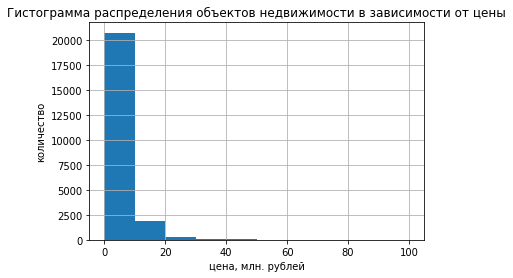

In [56]:
(data['last_price']/1000000).hist(range=(0, 100))
plt.title("Гистограмма распределения объектов недвижимости в зависимости от цены")
plt.xlabel("цена, млн. рублей")
plt.ylabel("количество")
plt.show()

Значения цены выше 20 миллионов являются аномальными. Удалим их.

In [57]:
data = data[data['last_price'] <= 20000000]

Посмотрим общую информацию по датафрейму после удалений и проверим какой процент данных был удален

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22619 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22619 non-null  int64         
 1   last_price            22619 non-null  float64       
 2   total_area            22619 non-null  float64       
 3   first_day_exposition  22619 non-null  datetime64[ns]
 4   rooms                 22619 non-null  int64         
 5   ceiling_height        22619 non-null  float64       
 6   floors_total          22610 non-null  float64       
 7   living_area           22619 non-null  float64       
 8   floor                 22619 non-null  int64         
 9   is_apartment          22619 non-null  bool          
 10  studio                22619 non-null  bool          
 11  open_plan             22619 non-null  bool          
 12  kitchen_area          22619 non-null  float64       
 13  balcony         

In [59]:
print('Процент удаленных строк равен', (23699-22619)/23699*100)

Процент удаленных строк равен 4.5571543103084515


Так как процент отброшенных данных меньше 10%, то это допустимо и можно продолжить работу с обновленными данными.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим столбец с ценой одного квадратного метра

In [60]:
data['square_meter_price'] = data['last_price'] / data['total_area']

Добавим день недели публикации объявления (0 - понедельник, 1 - вторник и тд)

In [61]:
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek

Добавим столбец с месяцем

In [62]:
data['month'] = data['first_day_exposition'].dt.month

Добавим столбец с годом

In [63]:
data['year'] = data['first_day_exposition'].dt.year

Добавим столбец с типом этажа, в котором будут значения - "первый", "последний" и "другой"

In [64]:
def type_of_floor(row):
    if row['floor'] == 1:
        return 'первый этаж'
    if row['floor'] == row['floors_total']:
        return 'последний этаж'
    else:
        return 'другой'
data['floor_type'] = data.apply(type_of_floor, axis=1)

Добавим столбец с расстоянием до центра в км и округлим его.

In [65]:
data['city_center_km'] = (data['city_centers_nearest']/1000).round(0)

Проверим добавленные столбцы

In [66]:
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70          16.0         51.0      8         False   False   
1            2.75          11.0         18.6      1         False   False   
2            2.55           5.0         34.3      4         False   False   
4            3.03          14.0         32.0     13         False   False   
5            2.65          12.0         14.4      5         False   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False          25.0      0.0         

### Проведите исследовательский анализ данных

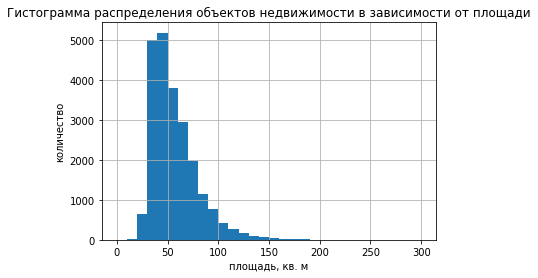

In [67]:
data['total_area'].hist(bins =30, range=(0, 300))
plt.title("Гистограмма распределения объектов недвижимости в зависимости от площади")
plt.xlabel("площадь, кв. м")
plt.ylabel("количество")
plt.show()

Большинство объектов недвижимости в объявлениях были с общей площадью от 30 до 50 кв. м. Так же значительная часть объектов распределена между площадью от 50 до 80 кв. м.
Достаточно маленькое количество с площадью от 20 до 30 кв. м.

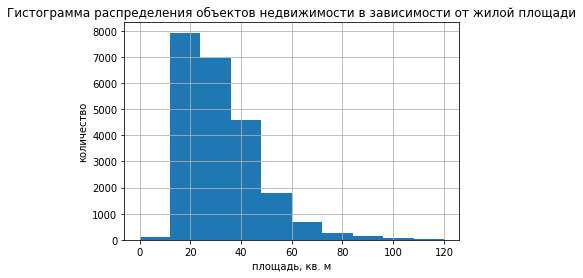

In [68]:
data['living_area'].hist(bins=10, range=(0, 120))
plt.title("Гистограмма распределения объектов недвижимости в зависимости от жилой площади")
plt.xlabel("площадь, кв. м")
plt.ylabel("количество")
plt.show()

Для большинство объектов жилая площадь распределяется от 18 кв. м до 50 кв. м

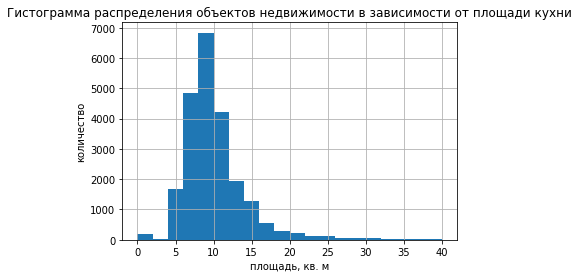

In [69]:
data['kitchen_area'].hist(bins=20, range=(0, 40))
plt.title("Гистограмма распределения объектов недвижимости в зависимости от площади кухни")
plt.xlabel("площадь, кв. м")
plt.ylabel("количество")
plt.show()

Площадь кухни большинства объектов распределена от 6 кв. м до 12 кв. м

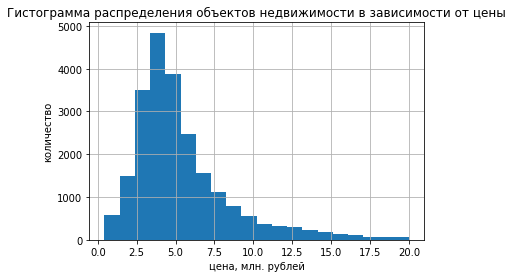

In [70]:
(data['last_price']/1000000).hist(bins=20)
plt.title("Гистограмма распределения объектов недвижимости в зависимости от цены")
plt.xlabel("цена, млн. рублей")
plt.ylabel("количество")
plt.show()

Большинство объектов с ценой от 2,5 млн до 6,5 млн

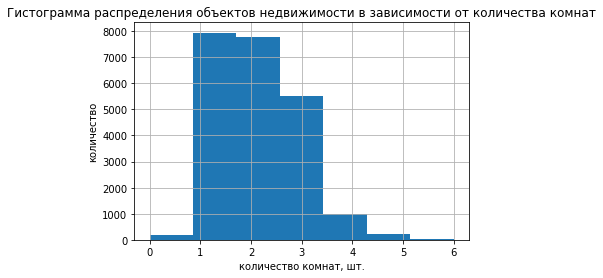

In [71]:
data['rooms'].hist(bins=7, range=(0, 6))
plt.title("Гистограмма распределения объектов недвижимости в зависимости от количества комнат")
plt.xlabel("количество комнат, шт.")
plt.ylabel("количество")
plt.show()

Основные объекты от 1 до 3 комнат (влючительно)

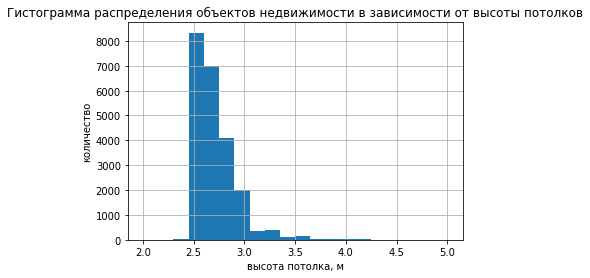

In [72]:
data['ceiling_height'].hist(bins=20, range=(2, 5))
plt.title("Гистограмма распределения объектов недвижимости в зависимости от высоты потолков")
plt.xlabel("высота потолка, м")
plt.ylabel("количество")
plt.show()

Большинство высот потолков распределено между 2,5 и 3,0 метров.

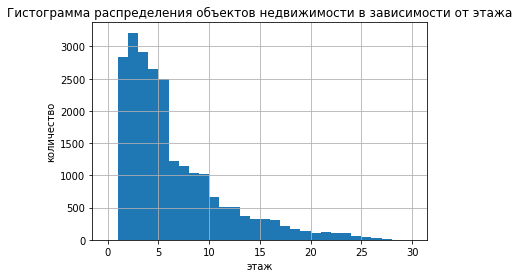

In [73]:
data['floor'].hist(bins=30, range=(0, 30))
plt.title("Гистограмма распределения объектов недвижимости в зависимости от этажа")
plt.xlabel("этаж")
plt.ylabel("количество")
plt.show()

Большая часть объектов расположена с первого по пятый этажи, включительно.

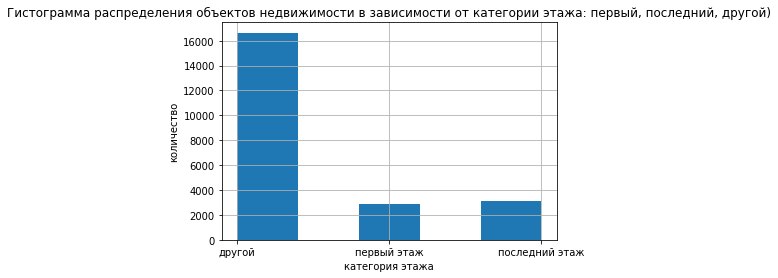

In [74]:
data['floor_type'].hist(bins=5)
plt.title("Гистограмма распределения объектов недвижимости в зависимости от категории этажа: первый, последний, другой)")
plt.xlabel("категория этажа")
plt.ylabel("количество")
plt.show()

Преобладают квартиры с типом этажа - "другой". Это означает, что объекты не расположы на первом и последнем этаже.

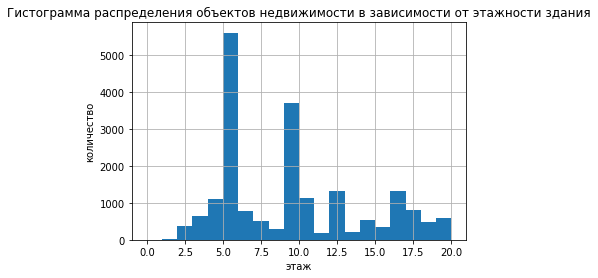

In [75]:
data['floors_total'].hist(bins=20, range=(0, 20))
plt.title("Гистограмма распределения объектов недвижимости в зависимости от этажности здания")
plt.xlabel("этаж")
plt.ylabel("количество")
plt.show()

Большинство объектов расположены в пятиэтажных и девятиэтажных домах.

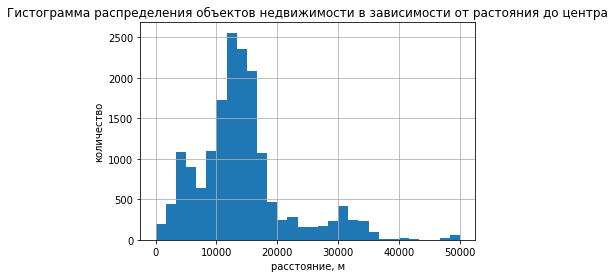

In [76]:
data['city_centers_nearest'].hist(bins=30, range=(0, 50000))
plt.title("Гистограмма распределения объектов недвижимости в зависимости от растояния до центра")
plt.xlabel("расстояние, м")
plt.ylabel("количество")
plt.show()

Большинство объектов распределены на удалении от 8000 метров до 18000 метров. Также наблюдаем небольшой пик на расстоянии 5000 метров.

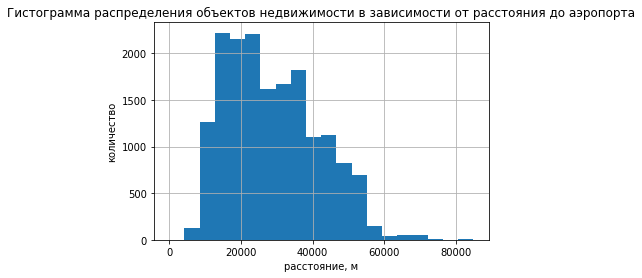

In [77]:
data['airports_nearest'].hist(bins=20)
plt.title("Гистограмма распределения объектов недвижимости в зависимости от расстояния до аэропорта")
plt.xlabel("расстояние, м")
plt.ylabel("количество")
plt.show()

Большая часть объектов расположены от ближайшего аэропорта на расстоянии от 10000 до 50000 метров.

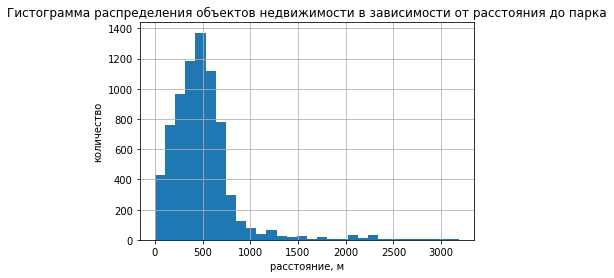

In [78]:
data['parks_nearest'].hist(bins=30)
plt.title("Гистограмма распределения объектов недвижимости в зависимости от расстояния до парка")
plt.xlabel("расстояние, м")
plt.ylabel("количество")
plt.show()

Растояние до ближайшего парка для большинства объектов составляет от 0 до 750 метров. Это относится только к объектам, в которых эта информациях была указана.
Думаю, что данная информация указывается далеко не всегда, а только в случаях близости к паркам.

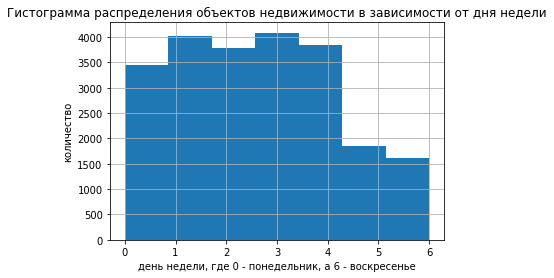

In [79]:
data['day_of_week'].hist(bins=7)
plt.title("Гистограмма распределения объектов недвижимости в зависимости от дня недели")
plt.xlabel("день недели, где 0 - понедельник, а 6 - воскресенье")
plt.ylabel("количество")
plt.show()

Большинство объявлений были размещены в будни, причем в понедельник немного меньше, чем в другие дни.
Меньше всего объявлений приходится на выходные. В воскресенье меньше, чем в субботу.

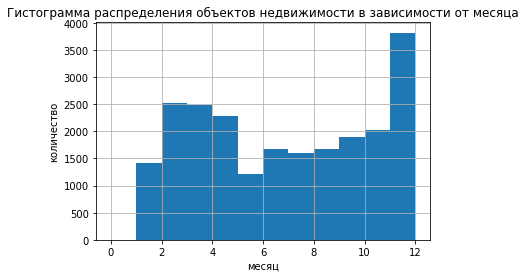

In [80]:
data['month'].hist(bins=12, range=(0, 12))
plt.title("Гистограмма распределения объектов недвижимости в зависимости от месяца")
plt.xlabel("месяц")
plt.ylabel("количество")
plt.show()

Минимальное количество объявлений размещалось в январе и мае, максимальное в декабре.
Наблюдается также большее количество оъявлений в зимние и первые весенние месяцы(февраль, март, апрель), чем в летние и осенние.

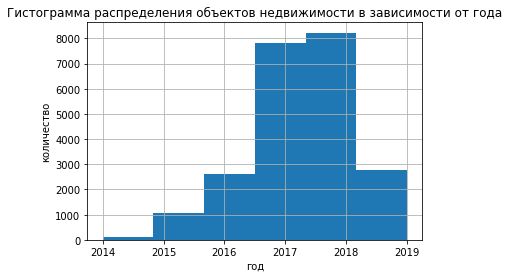

In [81]:
data['year'].hist(bins=6)
plt.title("Гистограмма распределения объектов недвижимости в зависимости от года")
plt.xlabel("год")
plt.ylabel("количество")
plt.show()

На гистограмме наблюдаем минимальное количество объявлений в 2014 году и максимальное в 2018 году. Наблюдаем достаточно достаточно мало объявлений в 2019 году. Это может быть связано с тем, что информация была только по части месяцам, а не по всему году.

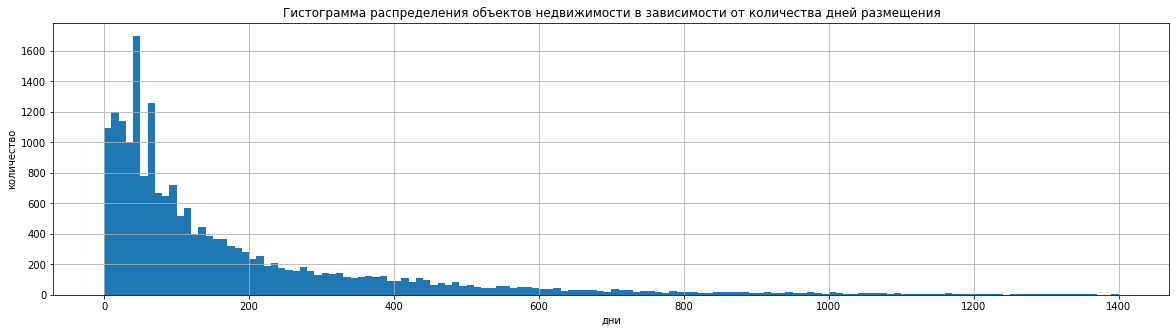

In [82]:
data['days_exposition'].hist(bins=140, range=(0, 1400), figsize=(20, 5))
plt.title("Гистограмма распределения объектов недвижимости в зависимости от количества дней размещения")
plt.xlabel("дни")
plt.ylabel("количество")
plt.show()

In [83]:
days_exposition_mean = data['days_exposition'].mean()

In [84]:
days_exposition_median = data['days_exposition'].median()

In [85]:
print('Среднее количество дней размещения объявления', days_exposition_mean)
print('Медианное значение количества дней размещения объявления', days_exposition_median)

Среднее количество дней размещения объявления 177.41357773941303
Медианное значение количества дней размещения объявления 93.0


In [86]:
data['days_exposition'].describe()

count    19694.000000
mean       177.413578
std        216.067968
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

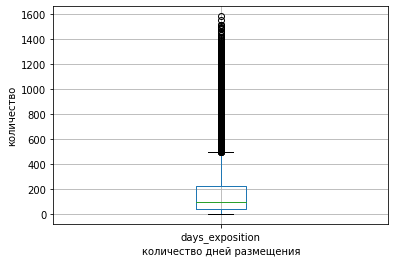

In [87]:
data.boxplot(column=['days_exposition'])
plt.xlabel("количество дней размещения")
plt.ylabel("количество")
plt.show()

Обычно продажа занимала от 44 дней до 226 дней.
Все что меньше 44 дней можем считать достаточно быстрой продажей, а все что более 226 дней - очень долгой.
Важно отметить большое количество выбросов со сроком продажи более 499 дней, поэтому для анализа в данном случае будет актуально значение меди

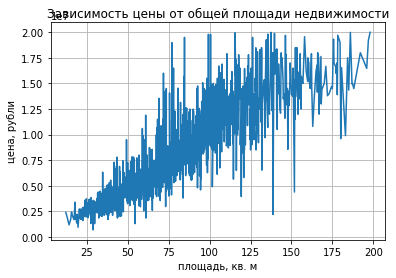

In [88]:
data.groupby('total_area')['last_price'].median().plot(grid=True)
plt.title("Зависимость цены от общей площади недвижимости")
plt.xlabel("площадь, кв. м")
plt.ylabel("цена, рубли")
plt.show()

Есть зависимость цены от общей площади. Чем больше общая площадь, тем выше цена.

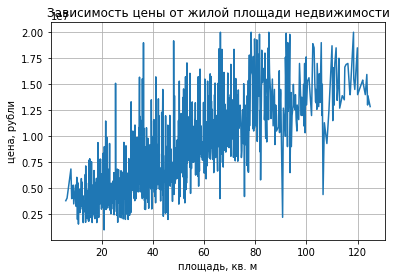

In [89]:
data.groupby('living_area')['last_price'].median().plot(grid=True)
plt.title("Зависимость цены от жилой площади недвижимости")
plt.xlabel("площадь, кв. м")
plt.ylabel("цена, рубли")
plt.show()

Есть некотрая зависимость цены от жилой площади. Но это может быть вызвано зависимостью жилой площади от общей площади.

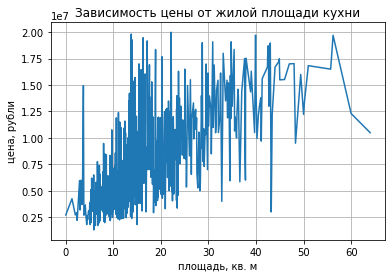

In [90]:
data.groupby('kitchen_area')['last_price'].median().plot(grid=True)
plt.title("Зависимость цены от жилой площади кухни")
plt.xlabel("площадь, кв. м")
plt.ylabel("цена, рубли")
plt.show()

Есть слобовыраженная зависимость цены от площади кухни. С увеличением площади кухни немного возрастает цена.

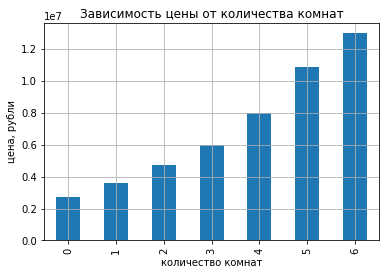

In [91]:
data.groupby('rooms')['last_price'].median().plot(grid=True, kind='bar')
plt.title("Зависимость цены от количества комнат")
plt.xlabel("количество комнат")
plt.ylabel("цена, рубли")
plt.show()

Есть небольшая зависимость цены от количества комнат: чем больше комнат, тем немного выше цена.

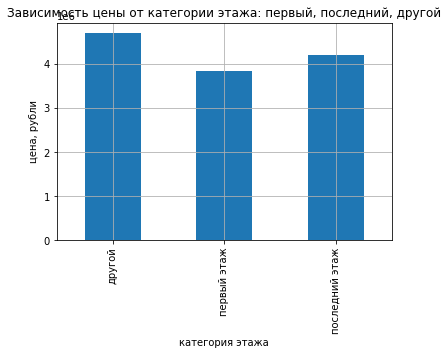

In [92]:
data.groupby('floor_type')['last_price'].median().plot(y='last_price', x='floor_type', kind='bar', grid=True)
plt.title("Зависимость цены от категории этажа: первый, последний, другой")
plt.xlabel("категория этажа")
plt.ylabel("цена, рубли")
plt.show()

Этаж может влиять на цену объектов. Квартиры на первом этаже стоят явно дешевле, чем на последней и других этажах.
Квартины на последнем этаже стоят дороже, чем на первом, но дешевле, чем на других.

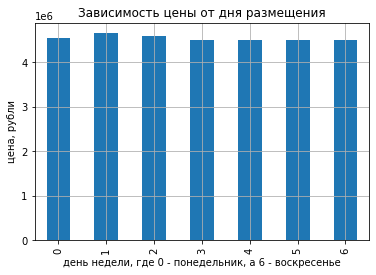

In [93]:
data.groupby('day_of_week')['last_price'].median().plot(kind='bar', grid=True)
plt.title("Зависимость цены от дня размещения")
plt.xlabel("день недели, где 0 - понедельник, а 6 - воскресенье")
plt.ylabel("цена, рубли")
plt.show()

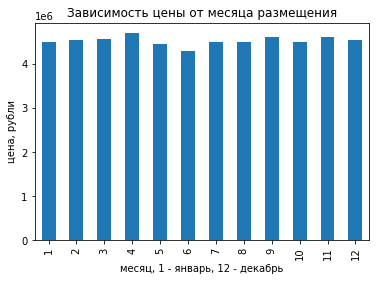

In [94]:
data.groupby('month')['last_price'].median().plot(kind='bar')
plt.title("Зависимость цены от месяца размещения")
plt.xlabel("месяц, 1 - январь, 12 - декабрь")
plt.ylabel("цена, рубли")
plt.show()

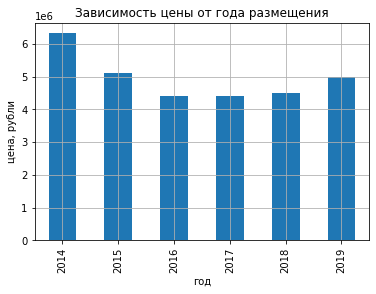

In [95]:
data.groupby('year')['last_price'].median().plot(kind='bar', grid=True)
plt.title("Зависимость цены от года размещения")
plt.xlabel("год")
plt.ylabel("цена, рубли")
plt.show()

Наблюдаем разный уровень цен в зависимости от года: в 2014 году он был самым высоким, значительно снизился в 2015 и далее в 2016.
В 2017 был примерно на уровне 2016, в 2018 начался рост, который продолжился в 2019 году.   

In [96]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.771948,0.644291,0.559313,0.499271
total_area,0.771948,1.000000,0.919589,0.517792,0.804182
living_area,0.644291,0.919589,1.000000,0.270435,0.889567
kitchen_area,0.559313,0.517792,0.270435,1.000000,0.184024
rooms,0.499271,0.804182,0.889567,0.184024,1.000000


По коэффициенту корреляции видно, что цена объектов в большей стемени зависит от общей площади, чуть в меньшей стемени от жилой площади и еще в меньшей степени от площади кухни и количества комнат. Но жилая площадь и количество комнат сильно зависят от общей площади, соответственно максимальное влияние оказывает общая площадь и небольшое влияние от площади кухни. 

In [97]:
#составим список 10 городов с наибольшим количеством оъектов
locality_name_top = (data['locality_name'].value_counts().head(10))

In [98]:
#с помощью цикла проходимся по каждому элементу созданного списка и находим среднюю цену за метр квадратный по топ-10 населенным пунктам
for i in locality_name_top.index:
    qu = data.query('locality_name == @i')
    current_value = round(qu['square_meter_price'].mean())
    print(f'Средняя цена в {i} {current_value}')

Средняя цена в Санкт-Петербург 108719
Средняя цена в поселок Мурино 85580
Средняя цена в посёлок Шушары 78733
Средняя цена в Всеволожск 67267
Средняя цена в Пушкин 101950
Средняя цена в Колпино 75378
Средняя цена в посёлок Парголово 90351
Средняя цена в Гатчина 68947
Средняя цена в деревня Кудрово 92500
Средняя цена в Выборг 58417


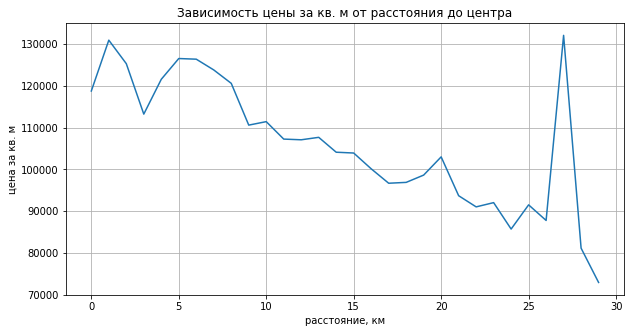

In [99]:
# Выделим объекты в Санкт-Петербурге, сгруппируем по расстоянию до центра и расчитаем среднюю цену за квадратный метр для каждого расстояния.
# Построим график зависимости средней цены за квадратный от расстояния до центра.
price_for_km = round(data[data['locality_name'] == 'Санкт-Петербург'].groupby('city_center_km')['square_meter_price'].mean())
price_for_km.plot(grid=True, figsize=(10, 5))
plt.title("Зависимость цены за кв. м от расстояния до центра")
plt.xlabel("расстояние, км")
plt.ylabel("цена за кв. м")
plt.show()

При расстоянии от центра от 0 км до 1 км цена повышается. Далее от 1 км до 3 км немного снижается, далее происходит рост до расстояния 6 км и потом цена снова снижается. Также небольшой рост наблюдается на расстоянии от 16 до 20 км и сильный рост от 26 до 27 км от центра. Такое может объясняться, например, наличием нового жилового квартала бизнесс-класса или наличием развитой инфраструктуры: школы, сады и тп.

### Общий вывод

Иследование проводилось с целью выявить взаимосвязи и зависимости на рынке недвижимости.
На первом этапе скорректировали неявные дубликаты и заполнили пропуски, там где это возможно. Так же был проведен проведен анализ данных с целью выявления и удаления аномальных значений. Такие данные встречались в следующих параметрах:
- цена
- общая площадь
- жилая площадь
- площадь кухни
- количество комнат
- высота потолков
Общее количество удаленных данных не превысило 10%, что позволяет использовать их для дальнейшего анализа.

Выявлен ряд закономерностей для объектов:
- общая площадь распределена от 30 до 80 кв. м с максимумом от 30 до 50 кв. м
- жилая площадь распределена от 18 до 50 кв. м
- площадь кухни распределена от 6 до 12 кв. м
- цена для большинства объектов состовляла от 2,5 млн. до 6,5 млн. рублей
- основное количество объектов было однокомнатными, двух- и трехкомнатными с высотой потолков от 2,5 до 3 метров
- располагается большинство квартир с 1 по 5 этаж. При этом если распределить этажи по групамм первый, последний и другой, то максимальное количество квартир будет на других этажах, гораздо меньше на последних и меньше всего на первых.
- максимальное количество квартир находится в пяти- и девятиэтажных домах
- удаленность от центра для большинства объектов составляет от 8 до 18 км, до аэропорта - от 10 до 50 км, до парка - от в пределах 750 метров.
- в будни объявлений размещано больше, чем в выходные
- максимальное количество объявлений было в декабре, а миниальное в январе и мае, с вевраля по апрель объявлений больше, чем с июня по ноябрь
- максимальное количество объявлений было в 2017 и 2018 годах

Срок продажи квартир обычно занимает от 44 дней до 226 дней.

На общую стоимость объекта в первую очередь влияет общая площадь, чем больше площадь, тем выше цена. Меньшее влияние оказывает жилая площадь, количество комнат и площадь кухни.
Дороже квартиры на этажах кроме первого и последнего, а перый этаж дешевле последнего.
Не выявлено влияния даты размещения.
Также выявлена зависимость цены кв. м от расстояния от центра. Чем дальше от центра, тем дешевле, за исключением снижения цены в непосредственной близости от центра до 1 км и резкого повышения на расстоянии от 26 км до 27 км.


Таким образом самая высокая цена будет у типичного объекта со следующими параметрами:
- общая площадь 80 кв. м
- жилая площадь 50 кв. м
- площадь кухни 12 кв. м
- количество комнат - 5
- этаж кроме первого и последне
- расстояние от центра

